Just to check if all packages we'll use can be loaded and unzip the data if you haven't yet:

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import sys
sys.path.append('../src/')


# these packages are only for the intro, so not super necessary
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression


import zipfile
from os import path
# extract data if csv file doesn't exist yet
if not path.exists("../data/immo_data.csv"):
    with zipfile.ZipFile("../data/immo_data.zip", 'r') as zip_ref:
        zip_ref.extractall("../data/")

# this should work after successfully extracting the data
from utils import iqr

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
import scipy.stats as stats

In [3]:
plt.style.use('corrie')
#plt.style.use('fivethirtyeight')

# Introduction: Motivation
Before we start doing some Bayesian modelling, let's shortly think why we would want to use Bayesian methods.

One advantage of Bayesian methods is how they deal with __Uncertainty__. Whereas traditional methods only give a point estimate, Bayesian methods return a probability distribution. From these probability distributions, we can deduce credibility intervals (the Bayesian equivalent of confidence intervals) but also allows us to make statements such as "the real parameter is larger _x_ with a probability of _p_). 

Knowing how uncertain our model is, is especially important when we have rather little data or need to  make high stake decisions (or both).

We can visualize the differences regarding uncertainty between Bayesian and traditional methods using the very traditional (albeit boring) coin toss example.

We're tossing a (biased) coin _N_ times and want to estimate the probability that it comes up head. This is equivalent to predicting the outcome of the next coin toss.

As non-Bayesian method, I'll use the `LogisticRegression()` classifier from `sklearn` on the previous recorded coin tosses. Since we don't have any other predictors except the past tosses, it basically predicts $\frac{\#heads}{N}$. The Bayesian method will instead return a probability distribution over the interval $[0,1]$.

In [12]:
p = 0.75
N = 4

# result of N coin tosses
y = np.array([1]* int(N*p) + [0]*(N - int(N*p)))
# dummy predictors
X = np.ones((y.shape[0],1))
X_test = [[1]]

In [13]:
model = LogisticRegression()

model.fit(X, y)

model.predict_proba(X_test)

array([[0.24999865, 0.75000135]])

As expected, the classifier estimates the probability for head as 75%. However, this is based on only 4 coin tosses! Seeing 3 tosses coming up head and one tail, I still wouldn't be very convinced the coin is biased.

Let's check the results for the Bayesian method:

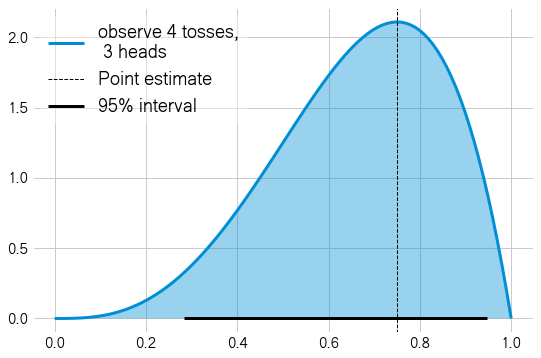

In [14]:
dist = stats.beta
x = np.linspace(0, 1, 100)

heads = y.sum()
prob_dens = dist.pdf(x, 1 + heads, 1 + N - heads)
cred_interval = dist.interval(0.95, 1 + heads, 1 + N - heads)
plt.plot(x, prob_dens, label=f"observe {N} tosses,\n {heads} heads" )
plt.fill_between(x, 0, prob_dens, alpha=0.4)
plt.hlines(y=0, xmin=cred_interval[0], xmax=cred_interval[1], label="95% interval")
plt.axvline(0.75, color="k", linestyle="--", lw=1, label="Point estimate")

leg = plt.legend()
leg.get_frame().set_alpha(0.4)

The distribution covers a wide range of all possible _head_ probabilities. From the distribution, we can derive the 95% interval, that is, the interval that contains the true parameter with a probability of 95%, which goes from $[ 0.28, 0.95]$. The Bayesian model is thus very uncertain about the true parameter.

We can do the same experiment with more tosses:

In [25]:
N = 100
y = np.array([1]* int(N*p) + [0]*(N - int(N*p)))
X = np.ones((y.shape[0],1))

model.fit(X,y)
model.predict_proba(X_test)

array([[0.25000016, 0.74999984]])

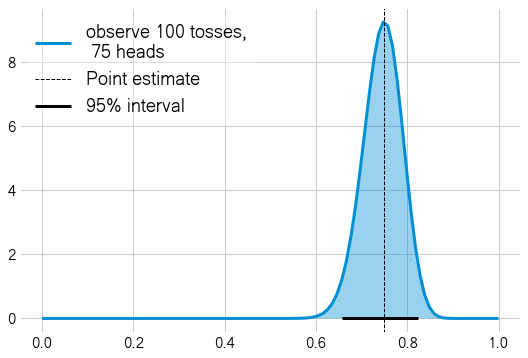

In [26]:
heads = y.sum()
prob_dens = dist.pdf(x, 1 + heads, 1 + N - heads)
cred_interval = dist.interval(0.95, 1 + heads, 1 + N - heads)

plt.plot(x, prob_dens, label=f"observe {N} tosses,\n {heads} heads" )
plt.fill_between(x, 0, prob_dens, alpha=0.4)
plt.hlines(y=0, xmin=cred_interval[0], xmax=cred_interval[1], label="95% interval")
plt.axvline(0.75, color="k", linestyle="--", lw=1, label="Point estimate")

plt.legend()
plt.show()

Whereas the logistic regression model gives the exact same result, the Bayesian model outputs a much smaller interval, $[0.66, 0.82]$ highlighting the increased confidence. We can now be much more certain the coin is indeed biased.

Another motivation to use Bayesian methods is that we can handcraft very flexible models which allows us to include domain knowledge. Such handcrafted models are also easier to interpret than so called black box models.


### Disclaimer: What this tutorial is not
This tutorial is definitely not complete. It is not an introduction to the theory behind Bayesian methods and will therefore not even mention Bayes formula. I will try to keep mathematical notation and formulas to a minimum and to only focus on how to use Bayesian methods in Python.
I will also not explain how the algorithms to compute these methods work behind the scenes. 

- For a gentle introduction to Bayesian methods, I recommend Richard McElreath's __"Statistical Rethinking"__. It focusses on the application of Bayesian methods but also gives the ideas and intuitions for the theory behind these methods and how they're computed. 
- __"Bayesian Data Analysis"__ by Gelman et al goes deep into Bayesian theory, if that's what you're after.